## 시계열 예측 : 다양한 모델이 있음
- AR : 자기회귀(추세 및 계절성분 제외)
- MA : 이동평균(추세 및 계절성분 제외)
- ARMA : 자기회귀 이동평균(추세 및 계절 성분 제외)
- ARIMA

### AR모형

In [2]:
import pandas as pd
forecast=pd.io.parsers.read_csv("a10forecast.csv")
original=pd.io.parsers.read_csv("a10.csv")

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(forecast['value'], lags=10)
model_fit=model.fit()

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


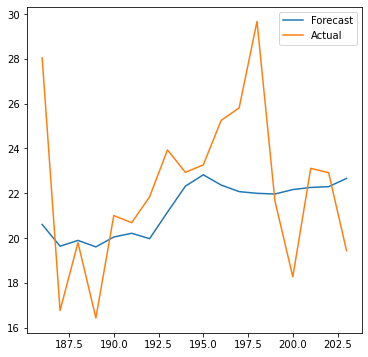

In [5]:
#모델을 예측하고 실제 원본 데이터에 대해 예측을 plot
import matplotlib.pyplot as plt

model_forecast=model_fit.predict(len(forecast), len(original)-1)
plt.figure(figsize=(6,6))
plt.plot(model_forecast, label="Forecast")
plt.plot(original.value[-18:], label="Actual")
plt.legend()

### MA모형

In [6]:
forecast=pd.io.parsers.read_csv("a10forecast.csv")
original=pd.io.parsers.read_csv("a10.csv")

In [7]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(forecast['value'], order=(0,0,2))
model_fit=model.fit()

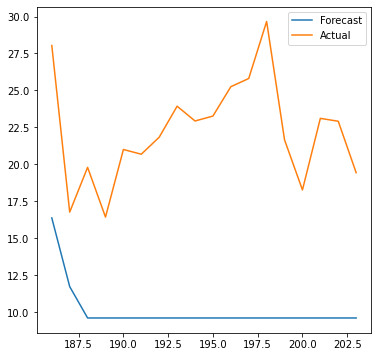

In [8]:
model_forecast=model_fit.predict(len(forecast), len(original)-1)
plt.figure(figsize=(6,6))
plt.plot(model_forecast, label="Forecast")
plt.plot(original.value[-18:], label="Actual")
plt.legend()

### ARMA
- ARMA is combination of ARM and MA

In [9]:
forecast=pd.io.parsers.read_csv("a10forecast.csv")
original=pd.io.parsers.read_csv("a10.csv")

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(forecast['value'], order=(10,0,2))
model_fit=model.fit()

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


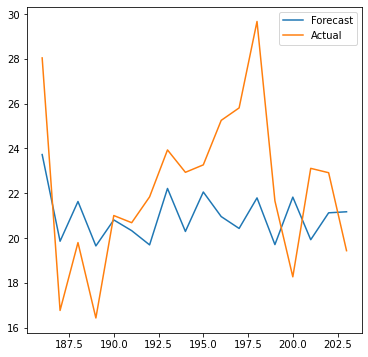

In [11]:
model_forecast=model_fit.predict(len(forecast), len(original)-1)
plt.figure(figsize=(6,6))
plt.plot(model_forecast, label="Forecast")
plt.plot(original.value[-18:], label="Actual")
plt.legend()

### ARIMA

In [12]:
forecast=pd.io.parsers.read_csv("a10forecast.csv")
original=pd.io.parsers.read_csv("a10.csv")

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(forecast['value'], order=(10,2,2))
model_fit=model.fit()

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


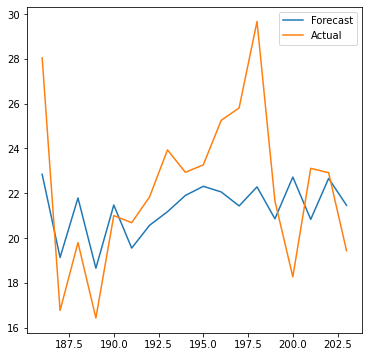

In [14]:
model_forecast=model_fit.predict(len(forecast), len(original)-1)
plt.figure(figsize=(6,6))
plt.plot(model_forecast, label="Forecast")
plt.plot(original.value[-18:], label="Actual")
plt.legend()

### SARIMA

In [15]:
forecast=pd.io.parsers.read_csv("a10forecast.csv")
original=pd.io.parsers.read_csv("a10.csv")

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(forecast['value'], order=(10,2,2), seasonal_order=(1,1,0,12))
#season관련 파라메타 생김
model_fit=model.fit()

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


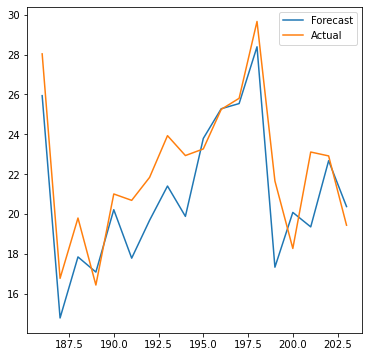

In [20]:
model_forecast=model_fit.predict(len(forecast), len(original)-1)
plt.figure(figsize=(6,6))
plt.plot(model_forecast, label="Forecast")
plt.plot(original.value[-18:], label="Actual")
plt.legend()
# 예측을 잘해줌!

### 지수평활법
- 너무 먼 가중치는 고려하지 않겠다

In [21]:
forecast=pd.io.parsers.read_csv("a10forecast.csv")
original=pd.io.parsers.read_csv("a10.csv")

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [23]:
model=ExponentialSmoothing(forecast['value'], seasonal_periods=12, trend='add', seasonal='add')
model_fit=model.fit()

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


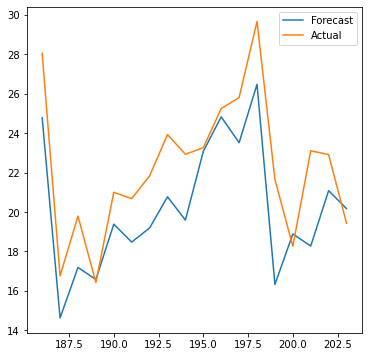

In [24]:
model_forecast=model_fit.predict(len(forecast), len(original)-1)
plt.figure(figsize=(6,6))
plt.plot(model_forecast, label="Forecast")
plt.plot(original.value[-18:], label="Actual")
plt.legend()